In [678]:

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost

In [679]:
data =  pd.read_csv('../old/train.csv')

In [680]:
data["date"] = data['datetime'].apply(lambda x : x.split()[0])
data["hour"] = data['datetime'].apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data['datetime'].apply(lambda x : x.split()[0].split("-")[0])
data["month"] = data['date'].apply(lambda string : string.split('-')[1])
data["day"] = data['date'].apply(lambda  string: string.split('-')[2])

season=pd.get_dummies(data['season'],prefix='season')
data=pd.concat([data,season],axis=1)
weather=pd.get_dummies(data['weather'],prefix='weather')
data=pd.concat([data,weather],axis=1)
data.drop(['season','weather'],inplace=True,axis=1)
#data['count'] = data['count'].apply(lambda x: np.log(x))
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,01,01,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,01,01,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,01,01,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,01,01,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,01,01,1,0,0,0,1,0,0,0


<AxesSubplot:xlabel='temp', ylabel='Count'>

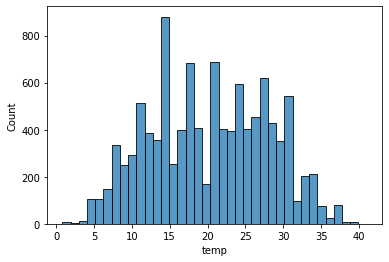

In [681]:
sns.histplot(data=data, x='temp')

<AxesSubplot:xlabel='atemp', ylabel='count'>

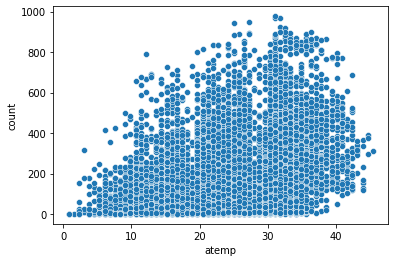

In [682]:
sns.scatterplot(data=data, x='atemp', y='count' )

<AxesSubplot:xlabel='temp', ylabel='count'>

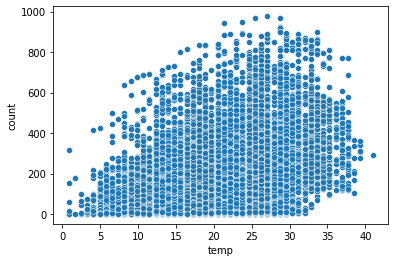

In [683]:
sns.scatterplot(data=data, x='temp', y='count')

In [684]:
tab = []
tab_wind = []
tab_temp = []
tab_atemp= []

for index, row in data.iterrows():
    if (row['humidity'] < 30):
        tab.append(0)
    elif(row['humidity'] < 65):
        tab.append(2)
    else:
        tab.append(1)
        
    if (row['windspeed'] < 12):
        tab_wind.append(0)
    elif (row['windspeed'] < 30):
        tab_wind.append(1)
    elif (row['windspeed'] < 50):
        tab_wind.append(2)
    else:
        tab_wind.append(3)
        
    if (row['temp'] < 5):
        tab_temp.append(0)
    elif(row['temp'] < 15):
        tab_temp.append(1)
    elif(row['temp'] < 25):
        tab_temp.append(2)
    elif(row['temp'] < 35):
        tab_temp.append(3)
    else:
        tab_temp.append(4)
        
    if (row['atemp'] < 8):
        tab_atemp.append(0)
    elif(row['atemp'] < 15):
        tab_atemp.append(1)
    elif(row['atemp'] < 25):
        tab_atemp.append(2)
    elif(row['atemp'] < 35):
        tab_atemp.append(3)
    else:
        tab_atemp.append(4)  

        
data["class_humidity"] = tab
data["class_windspeed"] = tab_wind
data['class_temp'] = tab_temp
data['class_atemp'] = tab_atemp
del data['humidity']
del data['windspeed']
del data['temp']
del data['atemp']

In [685]:
del data['casual']
del data['registered']
del data['datetime']
del data['date']
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [686]:
# data['temp'] = data['temp'].apply(lambda x : np.log1p(x))

# data['atemp'] = data['atemp'].apply(lambda x : np.log1p(x))

# data['humidity'] = data['humidity'].apply(lambda x : np.log1p(x))

# data['windspeed'] = data['windspeed'].apply(lambda x : np.log1p(x))

# data['hour'] = data['hour'].apply(lambda x : np.log1p(x))

for index, row in data.iterrows():
    if(row['year'] == 2012 and row['month'] == 9 and row['day'] == 1):
        break

# data['month'] = data['month'].apply(lambda x : np.log1p(x))

# data['day'] = data['day'].apply(lambda x : np.log1p(x))
year=pd.get_dummies(data['year'],prefix='year')
data=pd.concat([data,year],axis=1)
del data['year']
del data['day']

class_humidity=pd.get_dummies(data['class_humidity'],prefix='class_humidity')
data=pd.concat([data,class_humidity],axis=1)
del data['class_humidity']

# class_windspeed=pd.get_dummies(data['class_windspeed'],prefix='class_windspeed')
# data=pd.concat([data,class_windspeed],axis=1)
# del data['class_windspeed']

class_temp=pd.get_dummies(data['class_temp'],prefix='class_temp')
data=pd.concat([data,class_temp],axis=1)
del data['class_temp']

# class_atemp=pd.get_dummies(data['class_atemp'],prefix='class_atemp')
# data=pd.concat([data,class_atemp],axis=1)
# del data['class_atemp']

test = data[index:]
train = data[:index]
train['count'] = train['count'].apply(lambda x : np.log1p(x))




C:\Users\Apprenant\AppData\Local\Temp\ipykernel_10488\779302724.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['count'] = train['count'].apply(lambda x : np.log1p(x))


In [687]:
train

,holiday,workingday,count,hour,month,season_1,season_2,season_3,season_4,weather_1,...,year_2011,year_2012,class_humidity_0,class_humidity_1,class_humidity_2,class_temp_0,class_temp_1,class_temp_2,class_temp_3,class_temp_4
0,0,0,2.833213,0,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,0,0,3.713572,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2,0,0,3.496508,2,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0,2.639057,3,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0.693147,4,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,5.834811,19,8,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
9059,0,0,5.616771,20,8,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
9060,0,0,5.252273,21,8,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
9061,0,0,4.043051,22,8,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [688]:
x_train = train.copy()
del x_train['count']
y_train = train['count']

x_test = test.copy()
del x_test['count']
y_test = test['count']

In [689]:
model = RandomForestRegressor(random_state = 2,max_depth=15, max_features=18, n_estimators=42)
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
r2_score(y_test, y_pred)

0.8558061180758054

In [690]:
0.8722535590874699
42

42

In [691]:
model = GradientBoostingRegressor(random_state = 2)
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
r2_score(y_test, y_pred)

0.7854305946114264

In [692]:
model = ExtraTreesRegressor(random_state = 2)
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))

0.8466517606004379
0.15492518837961425


In [693]:
model = xgboost.XGBRegressor(random_state = 2)
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))

C:\Users\Apprenant\.conda\envs\pyca\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8910987066839355


In [694]:
data.head()

,holiday,workingday,count,hour,month,season_1,season_2,season_3,season_4,weather_1,...,year_2011,year_2012,class_humidity_0,class_humidity_1,class_humidity_2,class_temp_0,class_temp_1,class_temp_2,class_temp_3,class_temp_4
0,0,0,16,0,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,0,0,40,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2,0,0,32,2,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0,13,3,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,0,0,1,4,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [695]:
import lightgbm as lgb
categ = ['hour', 'month']
cate = ['class_humidity','class_windspeed','class_temp','class_atemp']
trans = make_column_transformer((StandardScaler(), categ))
model = make_pipeline(lgb.LGBMRegressor(boosting_type='gbdt', objective='regression',
                                learning_rate=0.19, reg_lambda=.9))
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8664260370510404
6203.656046596103


In [696]:
from sklearn.ensemble import VotingRegressor

lg = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression',
                                learning_rate=0.19, reg_lambda=.9)

xgb = xgboost.XGBRegressor(random_state = 2)

rf = RandomForestRegressor(random_state = 2,max_depth=15, max_features=18, n_estimators=42)

model = VotingRegressor([('lgb', lg),('xgb', xgb),('rf', rf)])
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))

C:\Users\Apprenant\.conda\envs\pyca\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9065422333657377
0.10863755230632327


C:\Users\Apprenant\.conda\envs\pyca\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [697]:
0.910238806944
0.1072534

0.1072534

In [698]:
0.891031120580918

0.891031120580918

tab = []
tab_wind = []
tab_temp = []
tab_atemp= []

for index, row in data.iterrows():
    if (row['humidity'] < 30):
        tab.append(0)
    elif(row['humidity'] < 65):
        tab.append(2)
    else:
        tab.append(1)
        
    if (row['windspeed'] < 12):
        tab_wind.append(0)
    elif (row['windspeed'] < 30):
        tab_wind.append(1)
    elif (row['windspeed'] < 50):
        tab_wind.append(2)
    else:
        tab_wind.append(3)
        
    if (row['temp'] < 5):
        tab_temp.append(0)
    elif(row['temp'] < 15):
        tab_temp.append(1)
    elif(row['temp'] < 25):
        tab_temp.append(2)
    elif(row['temp'] < 35):
        tab_temp.append(3)
    else:
        tab_temp.append(4)
        
    if (row['atemp'] < 8):
        tab_atemp.append(0)
    elif(row['atemp'] < 15):
        tab_atemp.append(1)
    elif(row['atemp'] < 25):
        tab_atemp.append(2)
    elif(row['atemp'] < 35):
        tab_atemp.append(3)
    else:
        tab_atemp.append(4)  

        
data["class_humidity"] = tab
data["class_windspeed"] = tab_wind
data['class_temp'] = tab_temp
data['class_atemp'] = tab_atemp
del data['humidity']
del data['windspeed']
del data['temp']
del data['atemp']

In [699]:
train.to_csv('train.csv')
test.to_csv('test.csv')